# Training node allostery in linear circuits
We begin by importing the relevant libraries

In [1]:
from circuit_utils import *
from network_utils import *
from cl_utils import *
import matplotlib.pyplot as plt


Define a graph, indicating the positions of the nodes. Here we use a predefined function for grid networks

In [2]:
g = grid_network(20, 20, periodic=False, size_uc = (1,1))

We define a trainable circuit 'allo' with the class CL.

In [3]:
initial_conductances = np.ones(g.number_of_edges())
allo = CL(g, initial_conductances, learning_rate=1.0, learning_step = 0)

 Here we train for node allostery. We pick three source nodes and impose voltages on them.
 Let's say we want the sources nodes to be those located at (0,0), (4,10) and (10,10), and the imposed voltages are 0, 0.5, 2.
 For the target nodes we choose (5,5) and (9,1) with desired target voltages 0.2 and 1.7

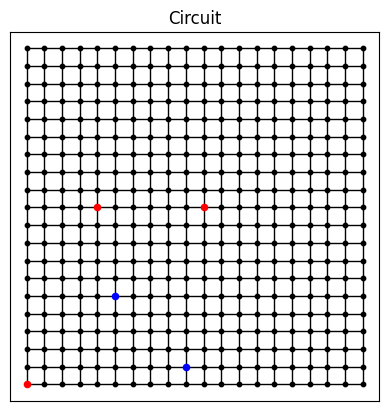

In [4]:
nodes_source = np.array([[0,0],[4,10],[10,10]])
indices_source = np.array([list(allo.graph.nodes).index(tuple(node)) for node in nodes_source])
inputs_source = np.array([0., 0.5, 2.])
nodes_target = np.array([[5,5],[9,1]])
indices_target = np.array([list(allo.graph.nodes).index(tuple(node)) for node in nodes_target])
outputs_target = np.array([0.2, 1.7])

_ = allo.set_task(indices_source, inputs_source, indices_target, outputs_target)

allo.plot_circuit(title = 'Circuit', lw=1.0, point_size=10.0, highlight_nodes=True)


We can visualize the current state of the system, prior to training.
We plot the free state, the conductances, and the power dissipated

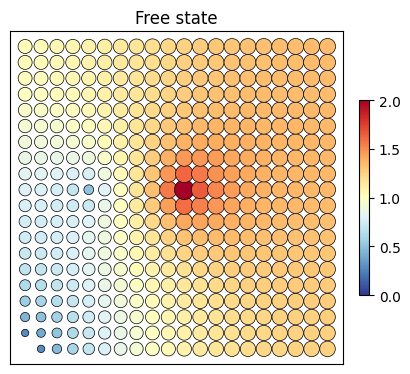

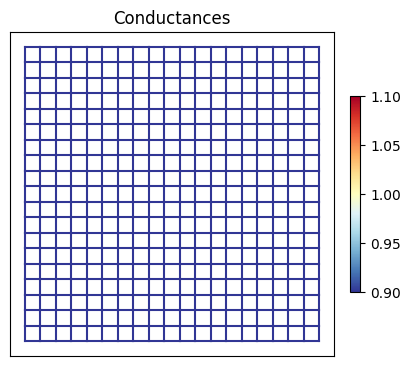

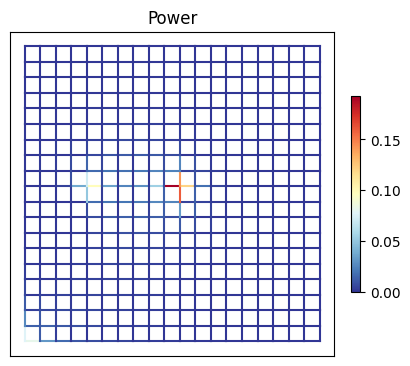

In [5]:
free_state = allo.get_free_state()
power_state = allo.get_power_state()
# plot the free state
allo.plot_node_state(free_state, title = 'Free state')
allo.plot_edge_state(allo.conductances, title = 'Conductances')
allo.plot_edge_state(power_state, title = 'Power')

# Training
Define the number of epochs, iterations per epoch and nudge amplitude.

In [6]:
n_epochs = 10
n_steps_per_epoch = 100
eta = 0.001
losses = allo.train(n_epochs,n_steps_per_epoch, eta = eta, verbose=False)[0]

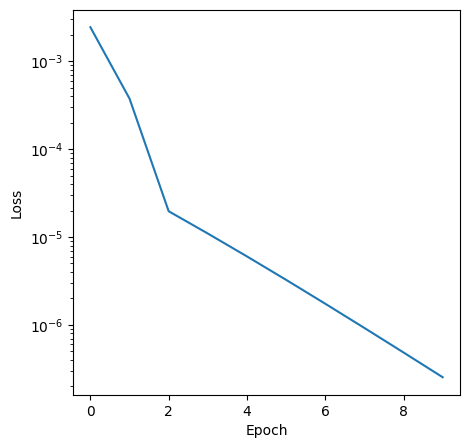

In [7]:
# plot the losses during training
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(losses)
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
ax.set_yscale('log')
plt.show()

We can visualize the free state, the conductances, the power dissipation, etc.

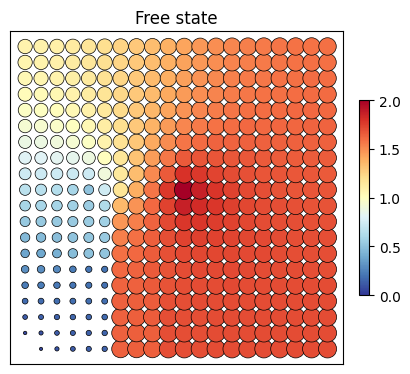

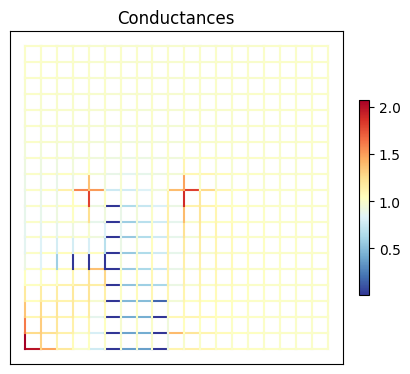

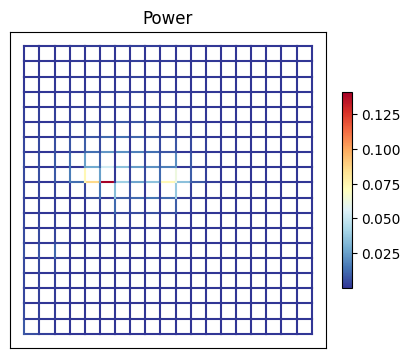

In [8]:
free_state = allo.get_free_state()
power_state = allo.get_power_state()
# plot the free state
allo.plot_node_state(free_state, title = 'Free state')
allo.plot_edge_state(allo.conductances, title = 'Conductances')
allo.plot_edge_state(power_state, title = 'Power')

Save the current circuit into a pickle file

In [9]:
allo.save('example_cl.pkl')

# Retraining
You can load the circuit and train it for a different task

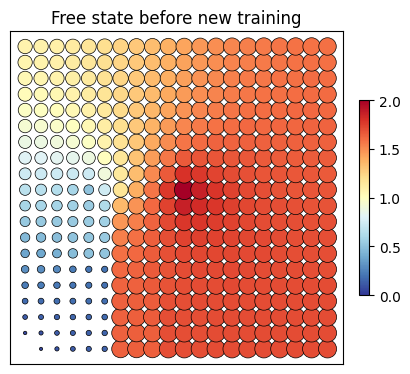

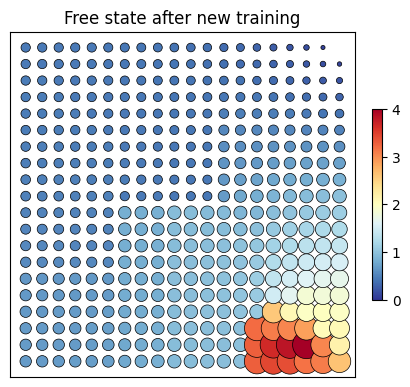

In [10]:
allo2 = load_circuit('example_cl.pkl')

# free state before new training
free_state = allo2.get_free_state()
allo2.plot_node_state(free_state, title = 'Free state before new training')

# new training
nodes_source = np.array([[19,19],[17,1]])
indices_source = np.array([list(allo2.graph.nodes).index(tuple(node)) for node in nodes_source])
inputs_source = np.array([0, 4.])
nodes_target = np.array([[5,10],[1,3],[10,10],[19,1]])
indices_target = np.array([list(allo2.graph.nodes).index(tuple(node)) for node in nodes_target])
outputs_target = np.array([0.4,0.6,0.2,2.])
_ = allo2.set_task(indices_source, inputs_source, indices_target, outputs_target)
n_epochs = 10
n_steps_per_epoch = 100
eta = 0.001
losses = allo2.train(n_epochs,n_steps_per_epoch, eta = eta, verbose=False)[0]


# free state after new training
free_state = allo2.get_free_state()
allo2.plot_node_state(free_state, title = 'Free state after new training')

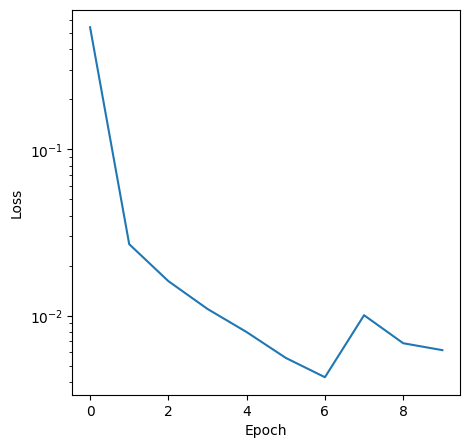

In [11]:
# plot the losses
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(losses)
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
ax.set_yscale('log')
plt.show()